<a href="https://colab.research.google.com/github/iCruzDaniel/AvalonpPagePHP/blob/main/notebooks/00_Linear_algebra_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra with Numpy

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar

Based on the jupyter notebook by [Vince Knight](https://github.com/drvinceknight/Python-Mathematics-Handbook)

Many computer vision algorithms require numeric computations performed with matrices and these are best solved with [Numpy](http://www.numpy.org/) a high performance numerical computing library.

Here is how it is described:

> NumPy is the fundamental package for scientific computing with Python. It contains among other things: [...]
 useful linear algebra, Fourier transform, and random number capabilities.

This notebook is a way to review several linear algebra concepts and to get acquainted with their computation in Python. In this section we will see how to:

- Manipulate matrices;
- Solve Matrix equations;
- Calculate Matrix inverse and determinants.

## Manipulating matrices

It is straightforward to create a Matrix using Numpy. Let us consider the following as a examples:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


First, we need to import Numpy:

In [2]:
import numpy as np

Now we can define $A$:

In [10]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [11]:
A

array([[ 5,  6,  2],
       [ 4,  7, 19],
       [ 0,  3, 12]])

In [12]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [13]:
B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [14]:
5 * A

array([[25, 30, 10],
       [20, 35, 95],
       [ 0, 15, 60]])

In [15]:
A ** 3

array([[ 125,  216,    8],
       [  64,  343, 6859],
       [   0,   27, 1728]])

In [16]:
A + B

array([[19,  4, 14],
       [ 8, 11, 24],
       [ 5,  8, 13]])

In [17]:
A - B

array([[ -9,   8, -10],
       [  0,   3,  14],
       [ -5,  -2,  11]])

In [18]:
A @ B

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

**Matrix multiplication.** Unfortunately, there are many ways to do [matrix multiplication in Python](https://blog.finxter.com/numpy-matmul-operator/ "NumPy Matrix Multiplication — np.matmul() and @ [Ultimate Guide] | Finxter"). The suggested way is to used the `@` operator because the `*` does not perform matrix multiplication.

Check that `np.dot(A, B)` produces the same result.

In [19]:
np.dot(A, B)

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

---

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

---

In [20]:
A = np.array([[1, -1],
              [2, 1]])
A**2 -2*A + 3

array([[2, 6],
       [3, 2]])

## Solving Matrix equations

We can use Numpy to (efficiently) solve large systems of equations of the form:

$$Ax=b$$

Let us illustrate that with:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$

In [21]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.array([[-1], [2], [1]])

We use the `linalg.solve` command:

In [22]:
x = np.linalg.solve(A, b)
x

array([[ 0.45736434],
       [-0.62790698],
       [ 0.24031008]])

We can verify our result:

In [23]:
A @ x

array([[-1.],
       [ 2.],
       [ 1.]])

---

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

---

In [24]:
np.linalg.solve(B, b)

array([[-0.25892857],
       [ 0.40178571],
       [ 0.28571429]])

## Matrix inversion and determinants

Computing the inverse of a matrix is straightforward:

In [25]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.20930233,  0.51162791, -0.7751938 ],
       [ 0.37209302, -0.46511628,  0.6744186 ],
       [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [26]:
A @ Ainv

array([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
       [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
       [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

The above might not look like the identity matrix but if you look closer you see that the diagonals are all `1` and the off diagonals are a **very** small number (which from a computer's point of view is `0`).

We can also verify that `A @ Ainv` is close to the identity matrix `np.eye()` using the `np.allclose()` command.

In [27]:
# Run this command to check that A @ Ainv is close to I
np.allclose(A @ Ainv, np.eye(3,3))

True

To calculate the determinant:

In [28]:
np.linalg.det(A)

-129.00000000000009

---

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

---

In [29]:
inv_B = np.linalg.inv(B)
print("Inversa de B:")
print(inv_B)

det_B = np.linalg.det(B)
print("\nDeterminante de B:")
print(det_B)

Inversa de B:
[[ 6.25000000e-02 -1.84523810e-01  1.72619048e-01]
 [-6.25000000e-02  1.36904762e-01  6.54761905e-02]
 [-1.09511795e-17  2.38095238e-01 -1.90476190e-01]]

Determinante de B:
-336.0


## Rotations

Rotation is a fundamental operation in computer graphics, robotics, and many other fields. In this exercise, you will create a 2D rotation matrix and apply it to a set of points.



Generate a set of points in 2D forming a square. You can do this manually or use the `np.mgrid` function.

In [30]:
points = np.array([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])

Create a function that returns a 2D rotation matrix given an angle in degrees. The rotation matrix for a counterclockwise rotation by an angle $\theta$ in 2D is:

\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\\\
\sin(\theta) & \cos(\theta)
\end{bmatrix}


In [31]:
# Here is the function
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


Apply the rotation matrix to the set of points for a few different angles (e.g., 45, 90, 180 degrees) and plot the original points and the transformed points using `plt.plot()`. You should see the square rotate.

Dont'forget to import matplotlib for plotting.

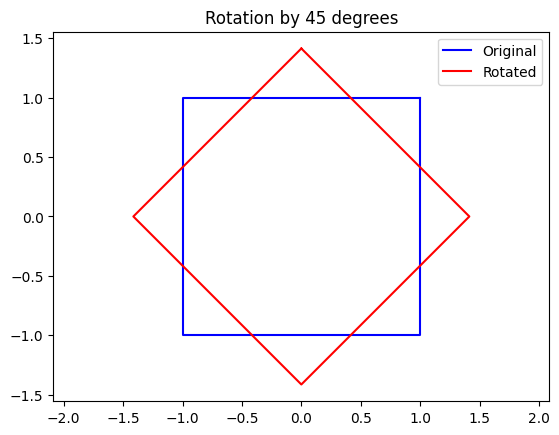

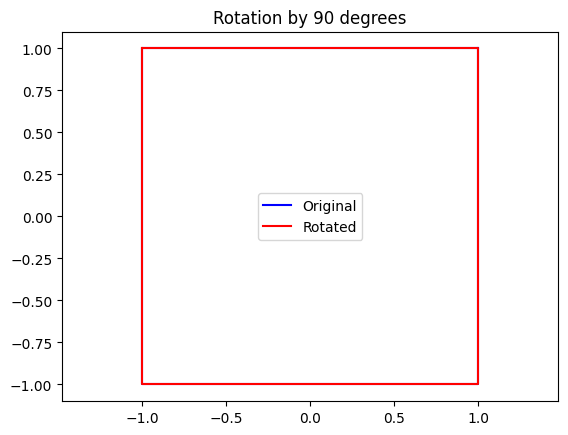

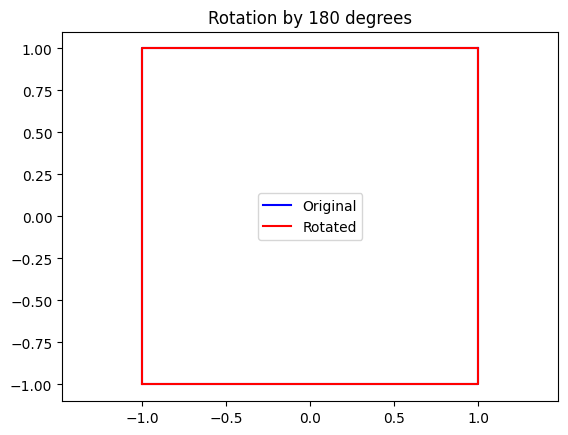

In [32]:
import matplotlib.pyplot as plt

for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_points = R @ points
    plt.figure()
    plt.plot(points[0, :], points[1, :], 'b-', label='Original')
    plt.plot(rotated_points[0, :], rotated_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()


---

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.

---

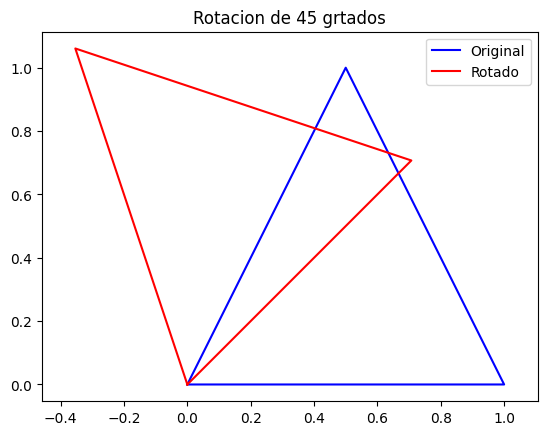

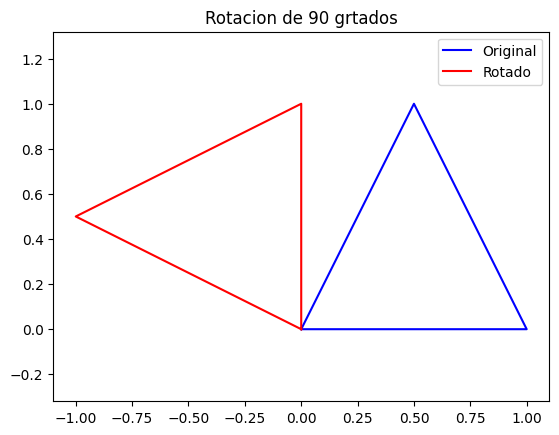

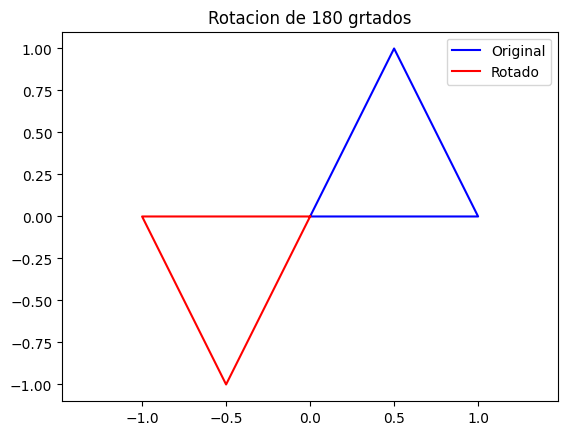

In [35]:
puntos_triangulo = np.array([[0, 1, 0.5, 0], [0, 0, 1, 0]])

for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    triangulo_rotado = R @ puntos_triangulo
    plt.figure()
    plt.plot(puntos_triangulo[0, :], puntos_triangulo[1, :], 'b-', label='Original')
    plt.plot(triangulo_rotado[0, :], triangulo_rotado[1, :], 'r-', label='Rotado')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotacion de {theta} grtados')
    plt.show()

## Exercise for Graduate students: Image Compression and Reconstruction using SVD

Use Singular Value Decomposition (SVD) to compress and reconstruct an image, exploring the trade-offs between compression ratio and image quality. This exercise will highlight the utility of SVD in practical image processing tasks.

### Steps

#### 1. Image Preparation
- Load a grayscale image into a Numpy array.
- Display the original image.

#### 2. Applying SVD
- Perform SVD on the image matrix to obtain U, Σ, and V^T.
- Display the shapes of U, Σ, and V^T.

#### 3. Image Compression
- Choose a set of singular values (e.g., first 10, 20).
- Reconstruct the image using only the chosen singular values.
- Repeat with different numbers of singular values to explore different compression levels.

#### 4. Visualization and Analysis
- Display original and compressed images side by side.
- Discuss the compression ratio and impact on image quality for each compression level.

#### 5. Advanced Exploration (Optional)
- Test the compression on different image types.
- Explore SVD in noise reduction by altering singular values before reconstruction.

### Requirements
- Use Numpy for SVD and matrix operations.
- Use matplotlib or similar for image handling.
- Provide explanations for each step, emphasizing the principles and applications of SVD.

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

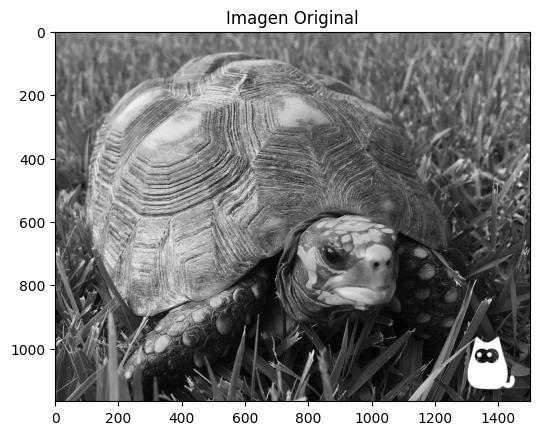

In [38]:
# 1. Preparación de la imagen
imagen = mpimg.imread('tortuga.jpg')  # Reemplaza 'imagen.png' con la ruta de tu imagen
imagen_gris = np.mean(imagen, axis=2)  # Convertir a escala de grises
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original')
plt.show()

In [39]:
# 2. Aplicando SVD
U, S, V = np.linalg.svd(imagen_gris)
print("Dimensiones de U, S, V:", U.shape, S.shape, V.shape)

Dimensiones de U, S, V: (1167, 1167) (1167,) (1500, 1500)


In [40]:
# 3. Compresión de la imagen
num_valores_singulares = [10, 20, 50]  # Experimenta con diferentes valores

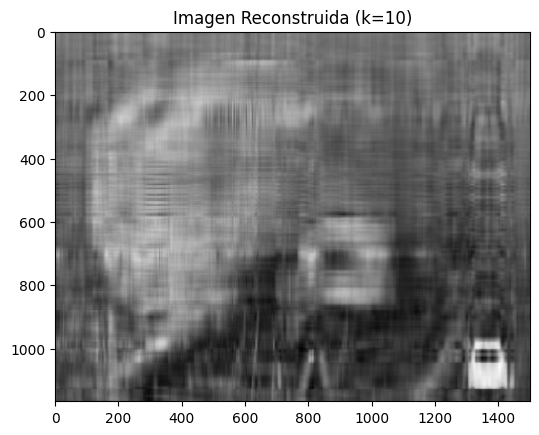

Tasa de compresión para k=10: 65.61094452773614


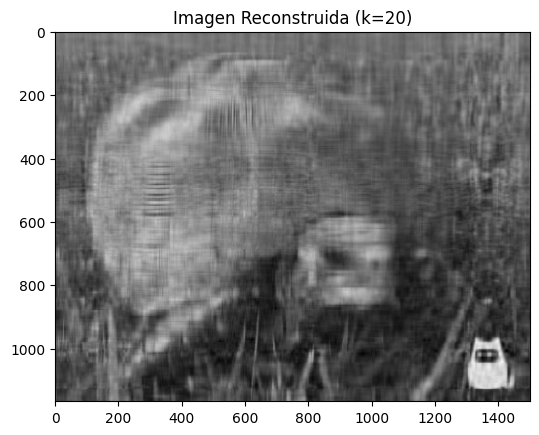

Tasa de compresión para k=20: 32.80547226386807


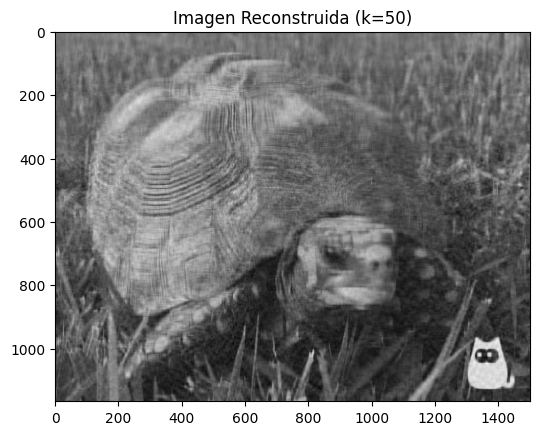

Tasa de compresión para k=50: 13.122188905547226


In [41]:
for k in num_valores_singulares:
    # Reconstruir la imagen usando k valores singulares
    imagen_reconstruida = U[:, :k] @ np.diag(S[:k]) @ V[:k, :]

    # 4. Visualización y análisis
    plt.imshow(imagen_reconstruida, cmap='gray')
    plt.title(f'Imagen Reconstruida (k={k})')
    plt.show()

    # Calcular la tasa de compresión
    tasa_compresion = imagen_gris.size / (k * (U.shape[0] + V.shape[1] + 1))
    print(f"Tasa de compresión para k={k}: {tasa_compresion}")

## Summary

In this section we have seen how to using Numpy:

- Manipulate matrices;
- Solve linear systems;
- Compute Matrix inverses and determinants.

This again just touches on the capabilities of Numpy. For more information please refer to this [Python tutorial.](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb)

In [42]:
!jupyter nbconvert --execute --to html "your_notebook_here.ipynb"

[NbConvertApp] WARNING | pattern 'your_notebook_here.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec